In [5]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import DataPreprocessor as dp
import numpy as np
import pandas as pd

from models import Sklearn_Classifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
model = Sklearn_Classifier(sklearn_classifier=RandomForestClassifier(criterion="log_loss", class_weight="balanced_subsample", max_depth=10, n_estimators=150, min_samples_split=4))
# Data Generation
sample_size = 1000
train_size = 0.8
train_sample_size = int(sample_size*train_size)
feature_size = 20
X = np.random.random((sample_size, feature_size))
y = np.random.choice([0, 1], size=sample_size)
# Train Test Split
X_train = X[:train_sample_size, :]
y_train = y[:train_sample_size]
X_test = X[train_sample_size:, :]
y_test = y[train_sample_size:]
print(f"Training Matrix: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test Matrix: {X_test.shape}")
print(f"Test labels {y_test.shape}")

Training Matrix: (800, 20)
Training labels: (800,)
Test Matrix: (200, 20)
Test labels (200,)


F1-score macro: 0.4799479947994799
Accuracy: 0.48


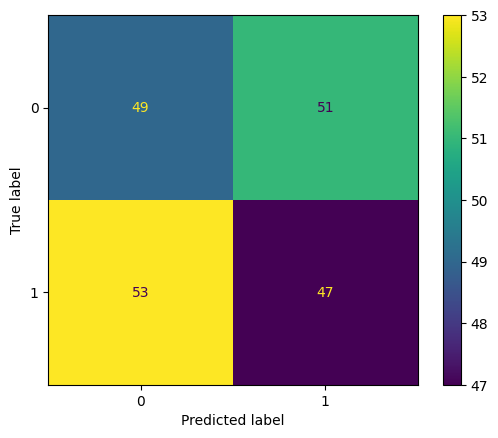

In [8]:
model.train_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test) 

In [114]:
# Örnek kullanım:
interval = '1h'
start_date = "01 Jan, 2021"
end_date = "10 Jun, 2024"
X, y = dp.get_historical_data(interval, start_date, end_date) # problem, X is df but y is np
feature_names = X.columns.tolist()
X = X.to_numpy()
print(X.shape)
print(y.shape)

(21364, 28)
(21364,)


Ugur's data

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# y'nin dağılımını çizme
def plot_y_distribution(y):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y)
    plt.title("Distribution of Target Variable (y)")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

def plot_and_save_correlation_matrix(x):
    plt.figure(figsize=(16, 12))
    corr_matrix = x.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix of Features")
    plt.show()
    
    # Korelasyon matrisini yazdırma
    print("Correlation Matrix:")
    print(corr_matrix)
    
    # Korelasyon matrisini dosyaya kaydetme
    with open('correlation_matrix.txt', 'w') as f:
        f.write(corr_matrix.to_string())

def plot_and_print_correlation_matrix(x):
    plt.figure(figsize=(16, 12))
    corr_matrix = x.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix of Features")
    plt.show()
    
    # Korelasyon matrisini yazdırma
    print("Correlation Matrix:")
    print(corr_matrix)

# y'nin dağılımını çiz
#plot_y_distribution(y)

# x'in korelasyon matrisini çiz
plot_and_print_correlation_matrix(X)


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1600x1200 with 0 Axes>

In [119]:
# Train Test Split
train_size = 0.8
train_sample_size = int(X.shape[0]*train_size)
X_train = X[:train_sample_size, :]
y_train = y[:train_sample_size]
X_test = X[train_sample_size:, :]
y_test = y[train_sample_size:]

print(f"Training Matrix: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test Matrix: {X_test.shape}")
print(f"Test labels {y_test.shape}")


Training Matrix: (17091, 28)
Training labels: (17091,)
Test Matrix: (4273, 28)
Test labels (4273,)


In [121]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import numpy as np

k = 11  # Seçmek istediğiniz en iyi özellik sayısı
selector = SelectKBest(score_func=f_classif, k=k)  
#estimator = RandomForestClassifier()
#selector = RFE(estimator, n_features_to_select=k, step=1)

# Model pipeline oluşturma
pipeline = Pipeline([
    ('feature_selection', selector),
    ('classification', RandomForestClassifier(criterion="log_loss", class_weight="balanced_subsample", max_depth=10, n_estimators=500, min_samples_split=4))
])

# Modeli eğitmef
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Model performansını değerlendirme
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

selected_features = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_features]
print("Selected Features:", selected_feature_names)


Accuracy: 0.5764100163819331
Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.23      0.33      1887
           1       0.58      0.85      0.69      2386

    accuracy                           0.58      4273
   macro avg       0.57      0.54      0.51      4273
weighted avg       0.57      0.58      0.53      4273



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

F1-score macro: 0.5456985835434375
Accuracy: 0.548326702550901


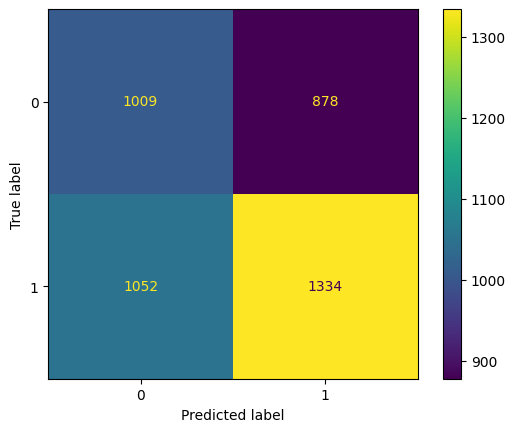

In [77]:
model = Sklearn_Classifier(sklearn_classifier=RandomForestClassifier(criterion="log_loss", class_weight="balanced_subsample", max_depth=10, n_estimators=500, min_samples_split=4))
model.train_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test) 

: 